<a href="https://colab.research.google.com/github/eemeidinger/loopy_copy/blob/main/loopy_copy_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from collections import OrderedDict
from warnings import filterwarnings

from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology,io
from skimage.filters import threshold_otsu,threshold_li


In [2]:
# In[deskew]:
def deskew(img):
    thresh=img
    edges = cv2.Canny(thresh,50,200,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/1000, 55)
    try:
        d1 = OrderedDict()
        for i in range(len(lines)):
            for rho,theta in lines[i]:
                deg = np.rad2deg(theta)
#                print(deg)
                if deg in d1:
                    d1[deg] += 1
                else:
                    d1[deg] = 1

        t1 = OrderedDict(sorted(d1.items(), key=lambda x:x[1] , reverse=False))
        print(list(t1.keys())[0],'Angle' ,thresh.shape)
        non_zero_pixels = cv2.findNonZero(thresh)
        center, wh, theta = cv2.minAreaRect(non_zero_pixels)
        angle=list(t1.keys())[0]
        if angle>160:
            angle=180-angle
        if angle<160 and angle>20:
            angle=12
        root_mat = cv2.getRotationMatrix2D(center, angle, 1)
        rows, cols = img.shape
        rotated = cv2.warpAffine(img, root_mat, (cols, rows), flags=cv2.INTER_CUBIC)

    except:
        rotated=img
        pass
    return rotated

def unshear(img):

    gray = img
    thresh = img.copy()
    #print(thresh)
    plt.imshow(thresh)
    plt.show()
    trans = thresh.transpose()

    arr=[]
    for i in range(thresh.shape[1]):
        arr.insert(0,trans[i].sum())

    arr=[]
    for i in range(thresh.shape[0]):
        arr.insert(0,thresh[i].sum())

    y = thresh.shape[0]-1-np.nonzero(arr)[0][0]
    y_top = thresh.shape[0]-1-np.nonzero(arr)[0][-1]

    trans1 = thresh.transpose()
    sum1=[]
    for i in range(trans1.shape[0]):
        sum1.insert(i,trans1[i].sum())

    height = y - y_top
    max_value = 255*height
    prev_num = len([i for i in sum1 if i>=(0.6*max_value)])
    final_ang = 0

    # # print(arr)
    # # print(x,y)
    for ang in range(-25,25,3):
        thresh = gray.copy()
        #print(thresh[0].shape)
        #print(ang)
        print('Ang',ang)
        if ang>0:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(ang))))
                if move >= temp.size:
                    move = temp.size
                thresh[i][:temp.size-move]=temp[move:]
                thresh[i][temp.size-move:] = [0 for m in range(move)]
        else:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(-ang))))
                if move >= temp.size:
                    move = temp.size
                #print(temp[:-3])
                #print(temp[:temp.size-move].shape, thresh[i][move%temp.size:].shape)
                thresh[i][move:]=temp[:temp.size-move]
                thresh[i][:move]=[0 for m in range(move)]

#         plt.imshow(thresh)
#         plt.show()
        trans1 = thresh.transpose()
        sum1=[]
        for i in range(trans1.shape[0]):
            sum1.insert(i,trans1[i].sum())
        #print(sum1)
        num = len([i for i in sum1 if i>=(0.60*max_value)])
        #print(num, prev_num)
        if(num>=prev_num):
            prev_num=num
            final_ang = ang
        #plt.imshow(thresh)
        #plt.show()
    #print("final_ang:", final_ang)

    thresh= gray.copy()
    if final_ang>0:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(final_ang))))
            if move >= temp.size:
                move = temp.size
            thresh[i][:temp.size-move]=temp[move:]
            thresh[i][temp.size-move:] = [0 for m in range(move)]
    else:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(-final_ang))))
            #print(move)
            if move >= temp.size:
                move = temp.size
            thresh[i][move:]=temp[:temp.size-move]
            thresh[i][:move]=[0 for m in range(move)]

    plt.imshow(thresh, cmap='gray_r')
    return thresh


Implementation

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cc_processed.png to cc_processed.png


In [ ]:
img = cv2.imread('example_crop_1746.png')

In [ ]:
img.shape

(854, 3230, 3)

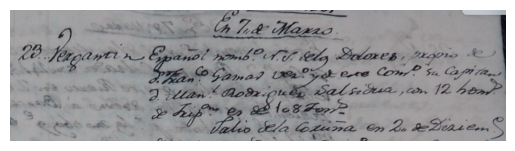

In [ ]:
plt.axis('off')
plt.imshow(img)

In [ ]:
def image_processer_2(img):
  retina = img[:,:,:3]
  retina = color.rgb2gray(retina)
  t0,t1,t2,t3,t4 = filters.threshold_multiotsu(retina, classes=6)

  mask = (retina < t0)
  vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
  thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
  labeled = ndi.label(thresholded)[0]


  thresh = threshold_otsu(retina)
  binary = thresh > retina
  binary = unshear(binary * 255)
  plt.axis('off')
  plt.imshow(binary)
  plt.savefig('processed_image',dpi=300,bbox_inches='tight',pad_inches=0)
  return binary

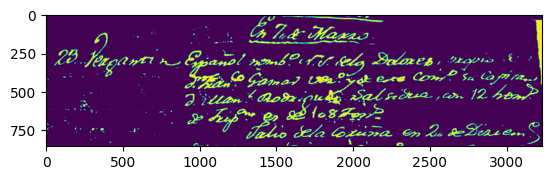

Ang -25
Ang -22
Ang -19
Ang -16
Ang -13
Ang -10
Ang -7
Ang -4
Ang -1
Ang 2
Ang 5
Ang 8
Ang 11
Ang 14
Ang 17
Ang 20
Ang 23


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

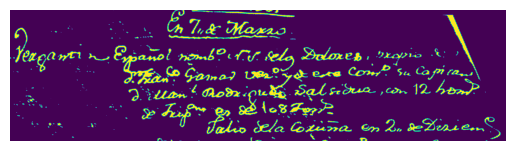

In [ ]:
image_processer_2(img)

In [13]:
img2 = cv2.imread('processed_image.png')

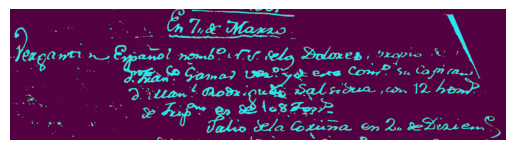

In [14]:
plt.axis('off')
plt.imshow(img2)

### Connected Components

In [15]:
import skimage

In [16]:
def connected_components(img, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = img
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # mask the image according to threshold
    binary_mask = gray_image > t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count, binary_mask

In [17]:
labeled_image, count, binary_mask= connected_components(img2)

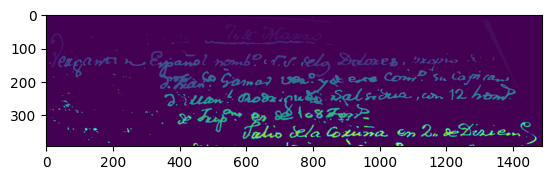

In [18]:
plt.imshow(labeled_image)

In [19]:
object_features = skimage.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]

In [20]:
min_area = 29

large_objects = []
for objf in object_features:
    if objf["area"] > min_area:
        large_objects.append(objf["label"])
print("Found", len(large_objects), "objects!")

Found 130 objects!


In [21]:
for object_id, objf in enumerate(object_features, start=1):
    if objf["area"] < min_area :
        labeled_image[labeled_image == objf["label"]] = 0

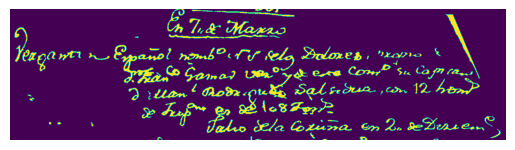

In [22]:
object_mask = skimage.morphology.remove_small_objects(binary_mask,min_area)
plt.axis('off')
plt.imshow(object_mask)

In [23]:
labeled_image, n = skimage.measure.label(object_mask,
                                         connectivity=2, return_num=True)

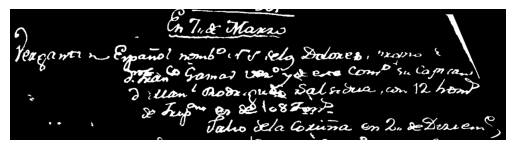

In [24]:
thresh = threshold_otsu(labeled_image)
labeled_image = thresh*.002 > labeled_image
plt.axis('off')
plt.imshow(labeled_image,cmap = 'gray_r')
plt.savefig('cc_processed')


In [4]:
img3 = cv2.imread('cc_processed.png')

In [5]:
from skimage.measure import label, regionprops, regionprops_table

In [6]:
from skimage.color.colorconv import rgb2gray
#object_features_filtered = skimage.measure.regionprops(img3)
img4 = rgb2gray(img3)
label_img = label(img4)
prop = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                'perimeter'))

In [7]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img4)
mask = img4 > threshold*0
labels = measure.label(mask)

fig = px.imshow(img4, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img4)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']


# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    comp = x, y
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)

Coordinates of the object number 1 is [238.73 317.31]


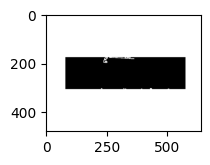

Coordinates of the object number 2 is [207.65 531.21]


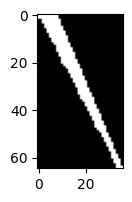

Coordinates of the object number 3 is [191.72 263.91]


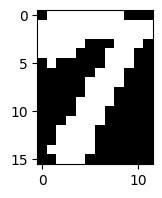

Coordinates of the object number 4 is [199.94 308.1 ]


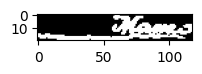

Coordinates of the object number 5 is [196.43 281.83]


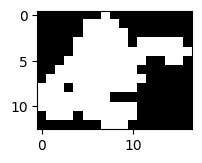

Coordinates of the object number 6 is [215.31  93.32]


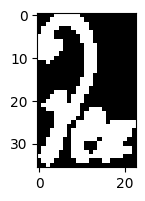

Coordinates of the object number 7 is [198.21 270.  ]


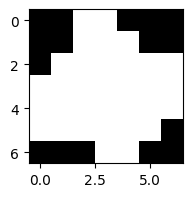

Coordinates of the object number 8 is [204.7 206.3]


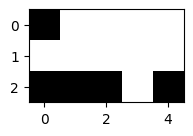

Coordinates of the object number 9 is [234.15 208.71]


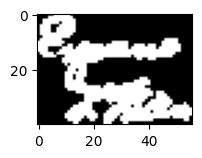

Coordinates of the object number 10 is [222.7  399.62]


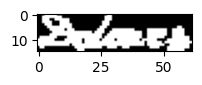

Coordinates of the object number 11 is [216.88 223.88]


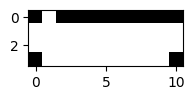

Coordinates of the object number 12 is [220.98 238.31]


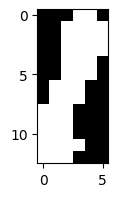

Coordinates of the object number 13 is [224.16 266.53]


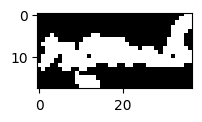

Coordinates of the object number 14 is [218.45 290.6 ]


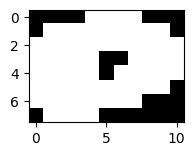

Coordinates of the object number 15 is [227.2  349.61]


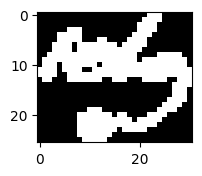

Coordinates of the object number 16 is [219.72 506.78]


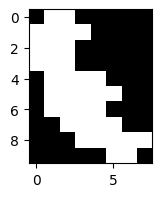

Coordinates of the object number 17 is [220.68 311.33]


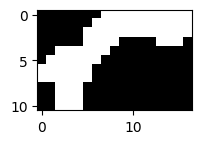

Coordinates of the object number 18 is [222.86 139.24]


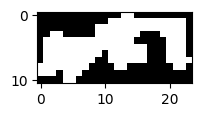

Coordinates of the object number 19 is [223.17 322.75]


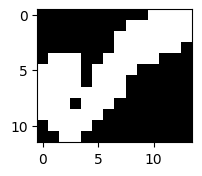

Coordinates of the object number 20 is [222.37 467.68]


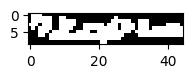

Coordinates of the object number 21 is [227.29 114.66]


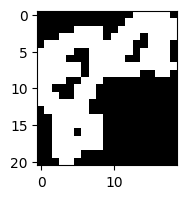

Coordinates of the object number 22 is [224.76 167.73]


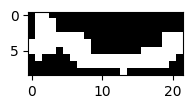

Coordinates of the object number 23 is [223.53 298.74]


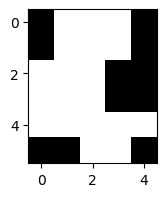

Coordinates of the object number 24 is [224.83 437.33]


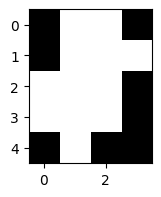

Coordinates of the object number 25 is [230.62 465.19]


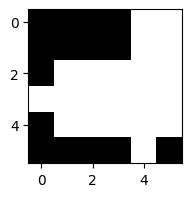

Coordinates of the object number 26 is [238.26 438.23]


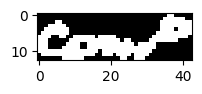

Coordinates of the object number 27 is [238.9  242.23]


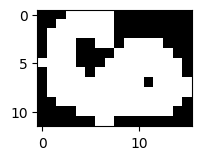

Coordinates of the object number 28 is [238.37 492.31]


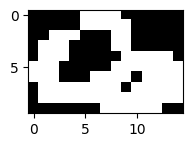

Coordinates of the object number 29 is [243.15 276.29]


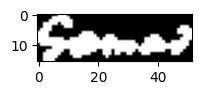

Coordinates of the object number 30 is [239.61 472.63]


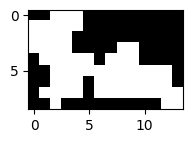

Coordinates of the object number 31 is [239.99 505.99]


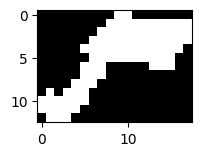

Coordinates of the object number 32 is [260.32 338.75]


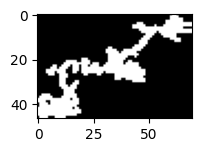

Coordinates of the object number 33 is [240.06 528.08]


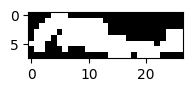

Coordinates of the object number 34 is [241.99 327.54]


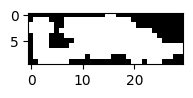

Coordinates of the object number 35 is [241.16 396.38]


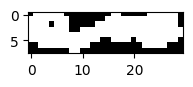

Coordinates of the object number 36 is [255.59 527.3 ]


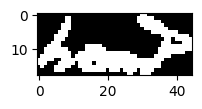

Coordinates of the object number 37 is [258.25 379.72]


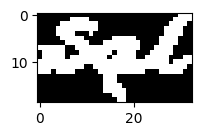

Coordinates of the object number 38 is [257.08 425.87]


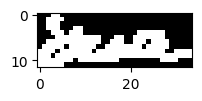

Coordinates of the object number 39 is [255.73 491.02]


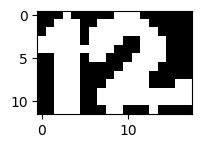

Coordinates of the object number 40 is [255.95 263.79]


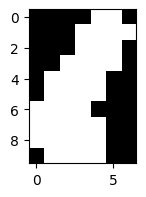

Coordinates of the object number 41 is [259.92 289.95]


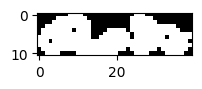

Coordinates of the object number 42 is [258.35 403.95]


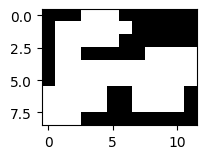

Coordinates of the object number 43 is [257.81 464.97]


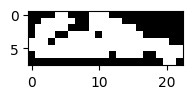

Coordinates of the object number 44 is [261.3 204.2]


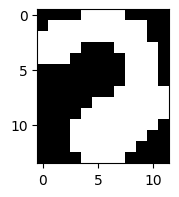

Coordinates of the object number 45 is [262.21 238.64]


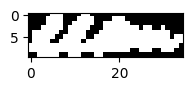

Coordinates of the object number 46 is [263. 219.]


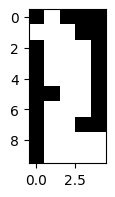

Coordinates of the object number 47 is [260.   451.23]


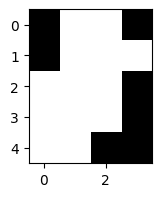

Coordinates of the object number 48 is [265.39 100.55]


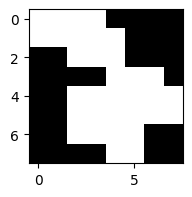

Coordinates of the object number 49 is [274.95 379.49]


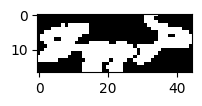

Coordinates of the object number 50 is [274.05 333.7 ]


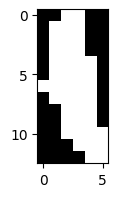

Coordinates of the object number 51 is [279.18 251.57]


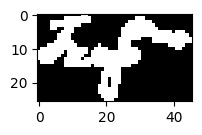

Coordinates of the object number 52 is [275.17 352.71]


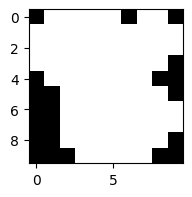

Coordinates of the object number 53 is [290.12 292.87]


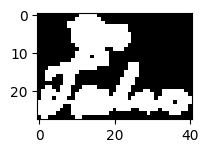

Coordinates of the object number 54 is [276.91 342.37]


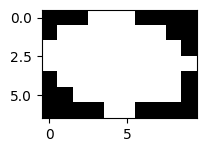

Coordinates of the object number 55 is [280.55 217.35]


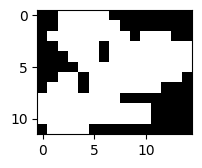

Coordinates of the object number 56 is [280.   399.67]


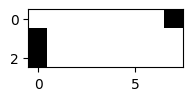

Coordinates of the object number 57 is [287.53 558.86]


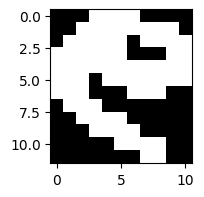

Coordinates of the object number 58 is [292.81 507.36]


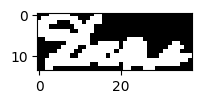

Coordinates of the object number 59 is [293.91 333.91]


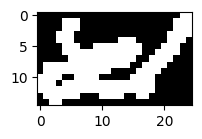

Coordinates of the object number 60 is [293.32 461.67]


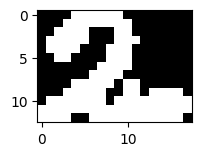

Coordinates of the object number 61 is [288.5 391. ]


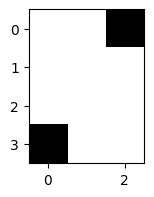

Coordinates of the object number 62 is [288.26 402.26]


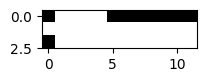

Coordinates of the object number 63 is [295.11 387.97]


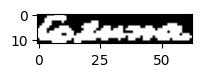

Coordinates of the object number 64 is [290.62 119.62]


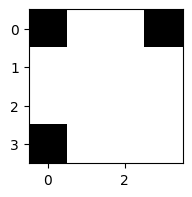

Coordinates of the object number 65 is [290.73 128.67]


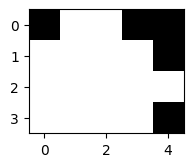

Coordinates of the object number 66 is [294.39 484.24]


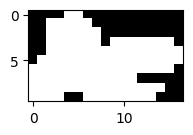

Coordinates of the object number 67 is [292.  161.6]


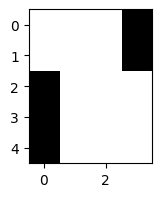

Coordinates of the object number 68 is [295.08 439.35]


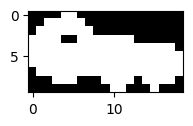

Coordinates of the object number 69 is [294.83 540.78]


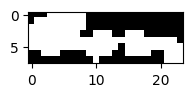

Coordinates of the object number 70 is [296.19 349.09]


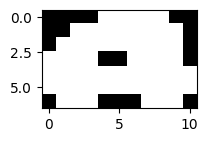

Coordinates of the object number 71 is [301.95 566.02]


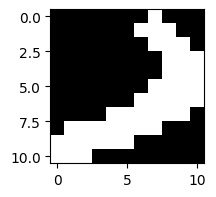

Coordinates of the object number 72 is [303.27 381.77]


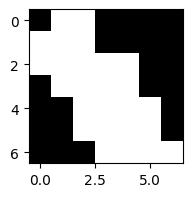

In [16]:
for i in range(len(props)):
    #for each object, print out its centroid and print the object itself
    print("Coordinates of the object number {} is {}".format(i+1, np.round(props[i]['centroid'],2)))
    mask = np.zeros(shape=props[i]['image'].shape)
    mask[props[i]['image']]=1
    plt.figure(figsize=(2,2))
    plt.imshow(mask, cmap=plt.cm.gray)
    plt.show()


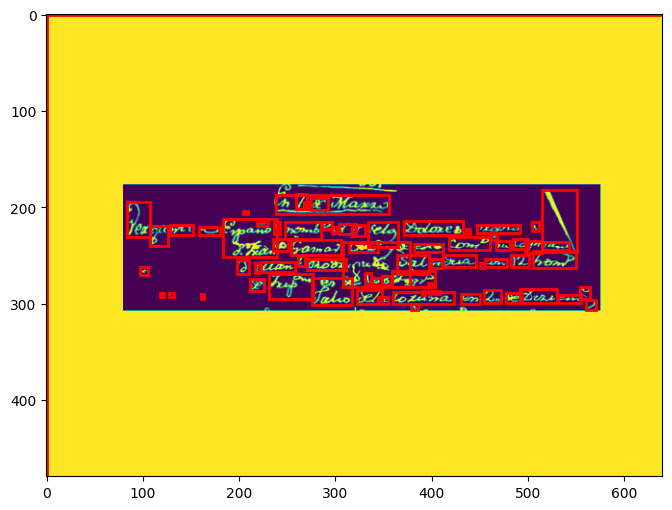

In [17]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(props)):
    #Get the coordinates of the big objects:
    minr, minc, maxr, maxc = props[i].bbox
    #Apply a red rectangle enclosing each object of interest
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                           fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
plt.imshow(img4)

(array([385. , 384. , 383. , 382. , 381.5, 381. , 380.5, 380.5, 380. ,
        379.5, 379. , 378.5, 378.5, 379. , 379.5, 380. , 381. , 381.5,
        381.5, 382. , 383. , 383.5, 383.5, 384. , 384.5, 384.5, 385. ,
        385.5, 385. ]),
 array([306.5, 306.5, 306.5, 306.5, 306. , 305.5, 305. , 304. , 303.5,
        303. , 302.5, 302. , 301. , 300.5, 300. , 299.5, 299.5, 300. ,
        301. , 301.5, 301.5, 302. , 303. , 303.5, 304. , 305. , 305.5,
        306. , 306.5]))

In [ ]:
#horizontal lines over image
#storing the connected

In [ ]:
##dont show user more code than they need
#describe all variable names
#use downsized image for thresholds